In [1]:
#Imports

import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from nbodykit.lab import *
from nbodykit import style, setup_logging
from pmesh.pm import ParticleMesh



In [2]:
plotting.BACKEND = 'matplotlib'
plt.rcParams['figure.figsize'] = (10,5)

In [3]:
#Example from pygsp tutorial

rs = np.random.RandomState(42)
W = rs.uniform(size=(30,30))
W[W < 0.93]
W = W + W.T
np.fill_diagonal(W,0)
G = graphs.Graph(W)
print('{} nodes, {} edges'.format(G.N, G.Ne))


30 nodes, 435 edges


In [4]:
G.is_connected()

True

/home/matt/.local/lib/python3.7/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


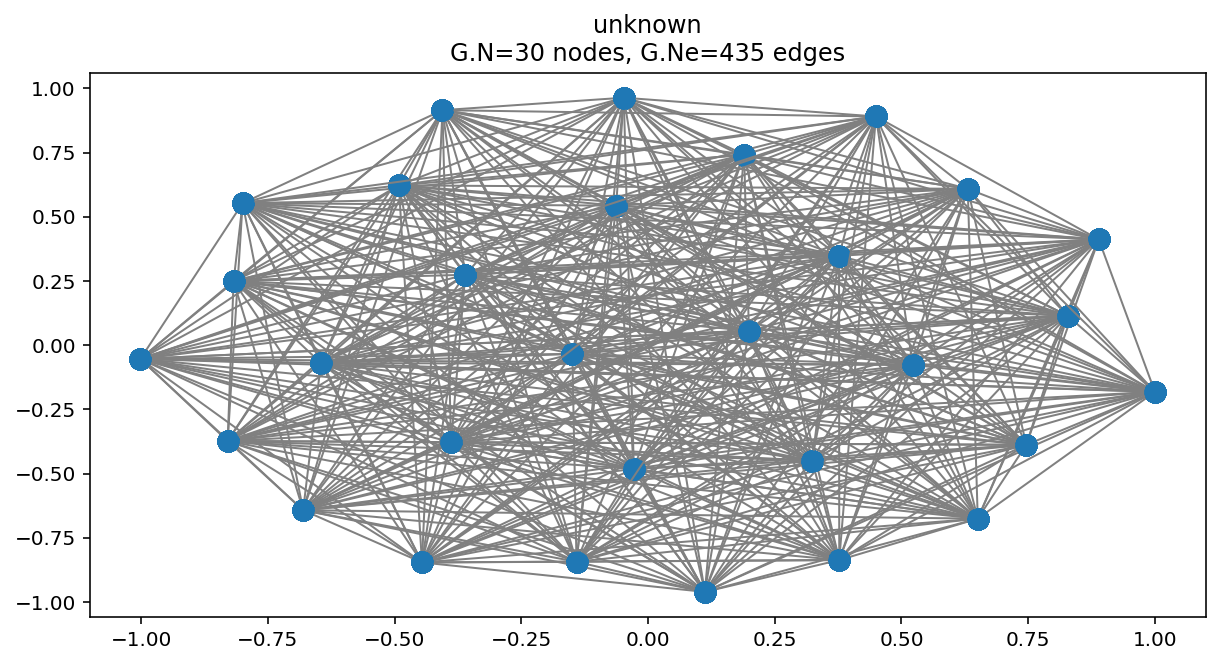

In [5]:
G.set_coordinates()

G.plot()

In [6]:
#Create sample universe

redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')

BoxSize=1380
nbar=3e-3
bias=1.0
seed=42
cat = LogNormalCatalog(Plin=Plin, nbar=3e-3, BoxSize=BoxSize, Nmesh=256, bias=1.0, seed=42)

#Extract particle positions
mesh = cat.to_mesh(resampler='tsc')
pos = np.array(mesh.Position)


In [7]:
np.array(mesh.Weight)


array([1., 1., 1., ..., 1., 1., 1.])

In [8]:
#Take small section of the cube for interpretability

size = 32
mask = (pos[:,0]<size)&(pos[:,1]<size)&(pos[:,2]<size)
smallcube = pos[mask,:]

In [9]:
smallcube.shape


(79, 3)

In [10]:
from sklearn.neighbors import NearestNeighbors

In [11]:
nbrs = NearestNeighbors(n_neighbors = 5,algorithm = 'auto').fit(smallcube) #Fit 

In [12]:
distances, indices = nbrs.kneighbors(smallcube)

In [13]:
mat = nbrs.kneighbors_graph(smallcube).toarray() #Get adjacency matrix for NN graph

In [14]:
mat

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [19]:
#Create the graph
#This is a nearest-neighbours graph

np.fill_diagonal(mat,0)
G = graphs.Graph(mat)
G.set_figwidth(4)
G.set_figheight(1)

AttributeError: 'Graph' object has no attribute 'set_figwidth'

In [16]:
print('{} nodes, {} edges'.format(G.N, G.Ne))


79 nodes, 316 edges


/home/matt/.local/lib/python3.7/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


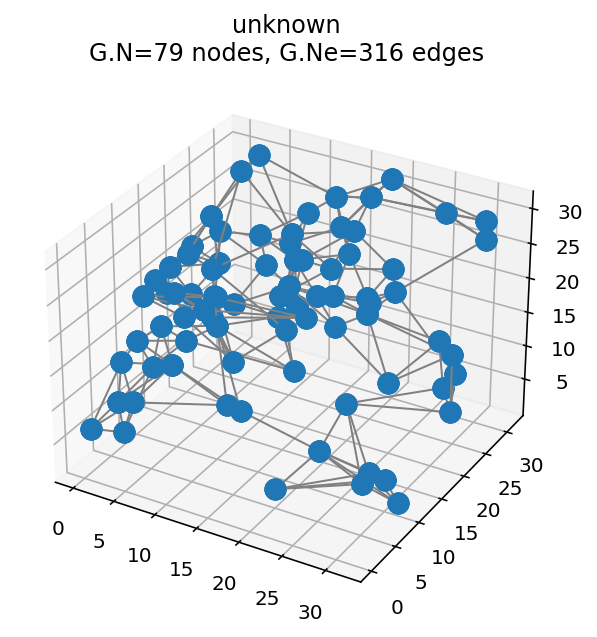

In [17]:
G.set_coordinates(smallcube)
G.plot()

TypeError: _plt_plot_graph() got an unexpected keyword argument 'vertex_color'

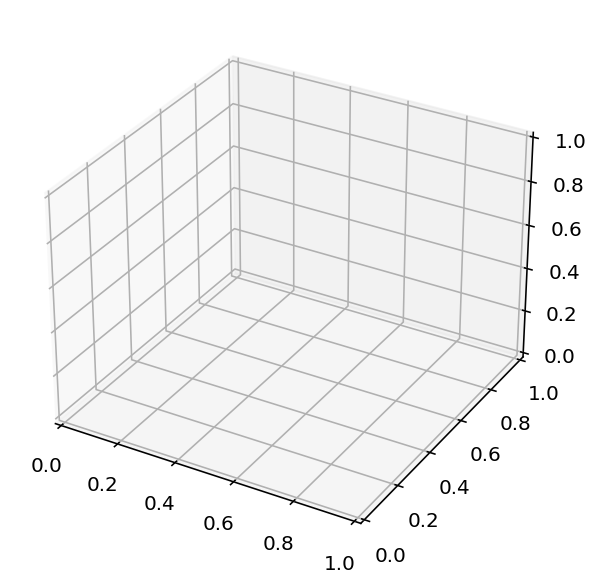

In [18]:
#G.plot()
import pygsp.plotting
plotting.plot_graph(G,vertex_color=np.array(mesh.Weight))

In [ ]:
universe_graph = graphs.Graph(mat,np.array(mesh.Weight),smallcube)

In [ ]:
universe_graph.plot()